# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import time

from sklearn import preprocessing, metrics
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
# Check the number of null values in each column
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# Check for unique values in each column  
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [6]:
# check number of records where the value is equal to 0
df.eq(0).sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              4
campaign              0
pdays                15
previous          35563
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
# Converting the datatype to best possilble datatypes
df_clean_1 = df.convert_dtypes()

In [9]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  Int64  
 1   job             41188 non-null  string 
 2   marital         41188 non-null  string 
 3   education       41188 non-null  string 
 4   default         41188 non-null  string 
 5   housing         41188 non-null  string 
 6   loan            41188 non-null  string 
 7   contact         41188 non-null  string 
 8   month           41188 non-null  string 
 9   day_of_week     41188 non-null  string 
 10  duration        41188 non-null  Int64  
 11  campaign        41188 non-null  Int64  
 12  pdays           41188 non-null  Int64  
 13  previous        41188 non-null  Int64  
 14  poutcome        41188 non-null  string 
 15  emp.var.rate    41188 non-null  Float64
 16  cons.price.idx  41188 non-null  Float64
 17  cons.conf.idx   41188 non-null 

In [10]:
# Data describe for string
df_clean_1.describe(include = ['string'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [11]:
df_clean_1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0
mean,40.02406,258.28501,2.567593,962.475454,0.172963,0.081886,93.575664,-40.5026,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.57096,0.57884,4.628198,1.734447,72.251528
min,17.0,0.0,1.0,0.0,0.0,-3.4,92.201,-50.8,0.634,4963.6
25%,32.0,102.0,1.0,999.0,0.0,-1.8,93.075,-42.7,1.344,5099.1
50%,38.0,180.0,2.0,999.0,0.0,1.1,93.749,-41.8,4.857,5191.0
75%,47.0,319.0,3.0,999.0,0.0,1.4,93.994,-36.4,4.961,5228.1
max,98.0,4918.0,56.0,999.0,7.0,1.4,94.767,-26.9,5.045,5228.1


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Business Objective
1. The business objective is to train a model with given dataset to predict the success of a contact, specifically whether the client subscribes to the deposit. 
2. The selected ML model holds the potential to enhance campaign efficiency by pinpointing key characteristics influencing success. 
3. By using this machine learning model, we can manage resources like human effort, phone calls, and time better. It will help us choose high-quality and cost-effective potential buyers.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [13]:
df_clean_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
### previous column has 35563 values = 0, dropping the column
df_clean_1.drop('previous', axis=1, inplace=True)

In [15]:
columns_7 = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','y']

In [16]:
df_clean_2 = df_clean_1[columns_7]

In [17]:
df_clean_2

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no
...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,yes
41184,46,blue-collar,married,professional.course,no,no,no,no
41185,56,retired,married,university.degree,no,yes,no,no
41186,44,technician,married,professional.course,no,no,no,yes


In [18]:
df_clean_2.describe(include = ['string'])

,job,marital,education,default,housing,loan,y
count,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2
top,admin.,married,university.degree,no,yes,no,no
freq,10422,24928,12168,32588,21576,33950,36548


In [19]:
#create categorical variables
training = pd.get_dummies(df_clean_2, columns=["job","marital","education","default","housing","loan"])
training.head()

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,56,no,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,57,no,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,True,False,False
2,37,no,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,True,True,False,False
3,40,no,True,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
4,56,no,False,False,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True


In [20]:
training.columns

Index(['age', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes'],
      dtype='object')

In [21]:
## Yes, No in each loan category are redundant. Dropping no columns
training.drop('default_no', axis=1, inplace=True)
training.drop('housing_no', axis=1, inplace=True)
training.drop('loan_no', axis=1, inplace=True)

In [22]:
final_train = training

In [23]:
final_train.head()

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes
0,56,no,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,no,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,37,no,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,40,no,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,56,no,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [24]:
cols = ['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown',
       'housing_yes','loan_unknown', 'loan_yes']

In [25]:
X = final_train[cols]
y = final_train['y']

In [26]:
final_train.describe()

,age
count,41188.0
mean,40.02406
std,10.42125
min,17.0
25%,32.0
50%,38.0
75%,47.0
max,98.0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Determine the baseline score for the classifier by using the `DummyClassifier` with the training data.  Score the estimator on the test set and assign this to `baseline_score` below.  
**Note**: The `DummyClassifier` works just as all other estimators you have encountered and has a `.fit` and `.score` method.

In [28]:
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
print("Baseline Model Score is %2.3f" % baseline_score)

Baseline Model Score is 0.887


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

### Problem 9: Score the Model

What is the accuracy of your model?

In [30]:
y_pred = logreg.predict(X_test)
print("Simple Logistic Regression accuracy is %2.3f" % accuracy_score(y_test, y_pred))


Simple Logistic Regression accuracy is 0.887


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### Logistic Regression 

In [37]:
logreg_start = time.time()
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)
logreg_end = time.time()
logreg_train_time = (logreg_end - logreg_start)
print("Logistic Regression Train Time %.4f" % logreg_train_time)
y_pred = logreg.predict(X_test)

Logistic Regression Train Time 2.1969


In [38]:
logreg_train_accuracy = accuracy_score(y_train, logreg.predict(X_train))
logreg_test_accuracy = accuracy_score(y_test, logreg.predict(X_test))
print('Logistic Regression Train Score is %2.4f' % logreg_train_accuracy)
print('Logistic Regression Test Score is %2.4f' % logreg_test_accuracy)

Logistic Regression Train Score is 0.8876
Logistic Regression Test Score is 0.8865


#### KNN 

In [39]:
knn_start = time.time()
knn = KNeighborsClassifier().fit(X_train,y_train)
knn_end = time.time()
knn_train_time = (knn_end - knn_start)
print("KNN Train Time %.4f" % knn_train_time)

KNN Train Time 0.0325


In [40]:
knn_train_accuracy = accuracy_score(y_train, knn.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knn.predict(X_test))
print('KNN Train Score is %2.4f' % knn_train_accuracy)
print('KNN Test Score is %2.4f' % knn_test_accuracy)

KNN Train Score is 0.8902
KNN Test Score is 0.8723


#### Decision Tree

In [41]:
DT_start = time.time()
model_DT = DecisionTreeClassifier().fit(X_train, y_train)
DT_end = time.time()
DT_train_time = DT_end - DT_start
print("Decision Tree Train Time %.4f" % DT_train_time)

Decision Tree Train Time 0.0753


In [42]:
DT_train_accuracy = accuracy_score(y_train, model_DT.predict(X_train))
DT_test_accuracy = accuracy_score(y_test, model_DT.predict(X_test))
print('Decision Tree Train Score is %2.4f' % DT_train_accuracy)
print('Decision Tree Test Score is %2.4f' % DT_test_accuracy)

Decision Tree Train Score is 0.9166
Decision Tree Test Score is 0.8623


#### SVM models

In [43]:
svc_start = time.time()
svc = SVC().fit(X_train, y_train)
svc_end = time.time()
svc_train_time = svc_end - svc_start
print("SVM Train Time %.4f" % svc_train_time)

SVM Train Time 4.9239


In [44]:
SVM_train_accuracy = accuracy_score(y_train, svc.predict(X_train))
SVM_test_accuracy = accuracy_score(y_test, svc.predict(X_test))
print('SVM Train Score is %2.4f' % SVM_train_accuracy)
print('SVM Test Score is %2.4f' % SVM_test_accuracy)

SVM Train Score is 0.8876
SVM Test Score is 0.8865


#### Results

In [45]:
res_dict = {'Model': ['Logistic Regression','KNN', 'Decision Tree', 'SVM'],
           'Train Time': [logreg_train_time, knn_train_time, DT_train_time, svc_train_time],
           'Train Accuracy': [logreg_train_accuracy, knn_train_accuracy, DT_train_accuracy, SVM_train_accuracy],
           'Test Accuracy': [logreg_test_accuracy, knn_test_accuracy, DT_test_accuracy, SVM_test_accuracy]}
results_df = pd.DataFrame(res_dict).set_index('Model')

In [46]:
results_df

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,2.196873,0.887557,0.886502
KNN,0.032518,0.890228,0.872299
Decision Tree,0.075276,0.916601,0.862345
SVM,4.923854,0.887557,0.886502


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [148]:
# Build a logreg and compute the feature importances
model = LogisticRegression()

# create the RFE model and select 10 attributes
rfe = RFE(model, n_features_to_select= 12)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['job_blue-collar', 'job_entrepreneur', 'job_retired', 'job_services', 'job_student', 'job_unemployed', 'marital_single', 'marital_unknown', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'default_unknown']


In [149]:
# dropping Unknow categories, since they don't narrow down the customer persona to predict accurately. 
selected_features = ['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_yes', 'housing_yes', 'loan_yes']

In [153]:
X2 = final_train[selected_features]
y2 = final_train['y']

#### Logistic Regression: Improving the Model

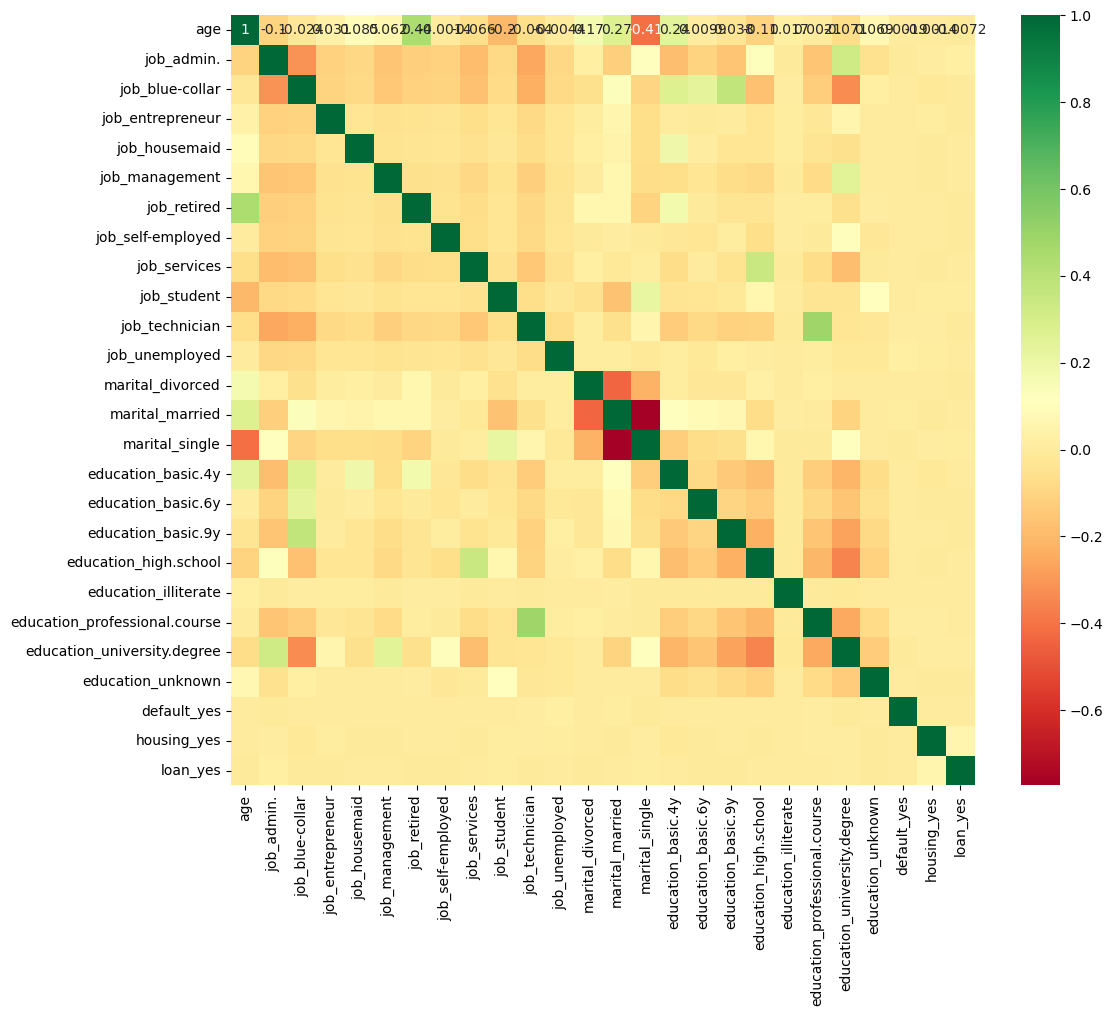

In [154]:
plt.subplots(figsize=(12, 10))
sns.heatmap(X2.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [155]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [156]:
logreg2_start = time.time()
logreg2 = LogisticRegression(max_iter = 1000)
logreg2.fit(X2_train, y2_train)
logreg2_end = time.time()
logreg2_train_time = (logreg_end - logreg_start)
print("Logistic Regression Train Time %.4f" % logreg2_train_time)

Logistic Regression Train Time 2.1969


In [157]:
logreg2_train_accuracy = accuracy_score(y2_train, logreg2.predict(X2_train))
logreg2_test_accuracy = accuracy_score(y2_test, logreg2.predict(X2_test))
print('Logistic Regression Train Score is %2.4f' % logreg2_train_accuracy)
print('Logistic Regression Test Score is %2.4f' % logreg2_test_accuracy)

Logistic Regression Train Score is 0.8876
Logistic Regression Test Score is 0.8865


Text(0.5, 23.52222222222222, 'Predicted label')

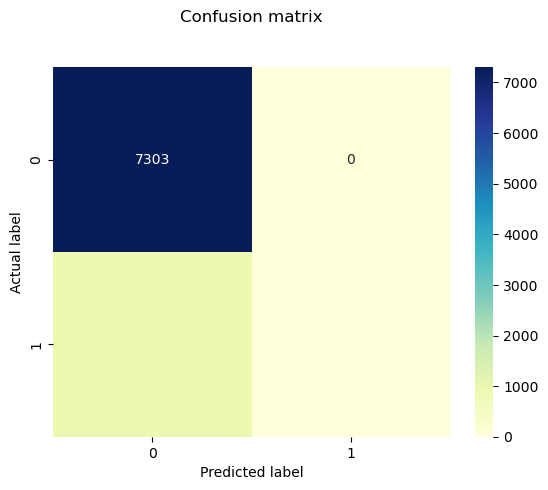

In [158]:
logreg2_cnf_matrix = metrics.confusion_matrix(y2_test, logreg2.predict(X2_test))
p = sns.heatmap(pd.DataFrame(logreg2_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [159]:
# classification report
print(classification_report(y2_test,logreg2.predict(X2_test)))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7303
         yes       0.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



#### KNN: Improving the Model

In [160]:
knn_test_scores = []
knn_train_scores = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    knn.fit(X2_train,y2_train)
    
    knn_train_scores.append(knn.score(X2_train,y2_train))
    knn_test_scores.append(knn.score(X2_test,y2_test))

In [161]:
knn_max_test_score = max(knn_test_scores)
knn_test_scores_ind = [i for i, v in enumerate(knn_test_scores) if v == knn_max_test_score]
print('Max test score {} % and k = {}'.format(knn_max_test_score*100,list(map(lambda x: x+1, knn_test_scores_ind))))

Max test score 88.46807477543092 % and k = [14]


In [162]:
knn2_start = time.time()
knn2 = KNeighborsClassifier(14).fit(X2_train,y2_train)
knn2_end = time.time()
knn2_train_time = (knn2_end - knn2_start)
print("KNN Train Time %.4f" % knn2_train_time)

KNN Train Time 0.0190


In [163]:
knn2_train_accuracy = accuracy_score(y2_train, knn2.predict(X2_train))
knn2_test_accuracy = accuracy_score(y2_test, knn2.predict(X2_test))
print('KNN Train Score is %2.4f' % knn2_train_accuracy)
print('KNN Test Score is %2.4f' % knn2_test_accuracy)

KNN Train Score is 0.8885
KNN Test Score is 0.8847


Text(0.5, 23.52222222222222, 'Predicted label')

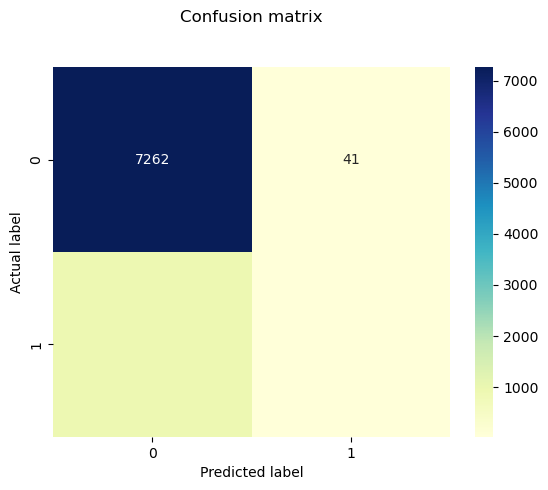

In [164]:
knn2_cnf_matrix = metrics.confusion_matrix(y2_test, knn2.predict(X2_test))
p = sns.heatmap(pd.DataFrame(knn2_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [165]:
# classification report
print(classification_report(y2_test,knn2.predict(X2_test)))

              precision    recall  f1-score   support

          no       0.89      0.99      0.94      7303
         yes       0.39      0.03      0.05       935

    accuracy                           0.88      8238
   macro avg       0.64      0.51      0.50      8238
weighted avg       0.83      0.88      0.84      8238



#### Decision Tree: Improving the Model

In [166]:
dt_train_accuracies = []
#print(train_accuracies, 'starting with empty list \n')
dt_test_accuracies = []
#print(test_accuracies, 'starting with empty list \n')


for i in range(1, 10):
    dt_model = DecisionTreeClassifier(max_depth=i).fit(X2_train, y2_train)
    dt_train_accuracy = accuracy_score(y2_train, dt_model.predict(X2_train))
    dt_test_accuracy = accuracy_score(y2_test, dt_model.predict(X2_test))
    dt_train_accuracies.append(dt_train_accuracy)
    dt_test_accuracies.append(dt_test_accuracy)
    print(f"Max Depth: {i}, Train Accuracy: {dt_train_accuracy:.4f}, Test Accuracy: {dt_test_accuracy:.4f}")

Max Depth: 1, Train Accuracy: 0.8876, Test Accuracy: 0.8865
Max Depth: 2, Train Accuracy: 0.8876, Test Accuracy: 0.8865
Max Depth: 3, Train Accuracy: 0.8876, Test Accuracy: 0.8865
Max Depth: 4, Train Accuracy: 0.8882, Test Accuracy: 0.8871
Max Depth: 5, Train Accuracy: 0.8884, Test Accuracy: 0.8869
Max Depth: 6, Train Accuracy: 0.8890, Test Accuracy: 0.8865
Max Depth: 7, Train Accuracy: 0.8893, Test Accuracy: 0.8866
Max Depth: 8, Train Accuracy: 0.8900, Test Accuracy: 0.8866
Max Depth: 9, Train Accuracy: 0.8913, Test Accuracy: 0.8855


In [167]:
DT2_start = time.time()
model_DT2 = DecisionTreeClassifier(max_depth=4).fit(X2_train, y2_train)
DT2_end = time.time()
DT2_train_time = DT2_end - DT2_start
print("Decision Tree Train Time %.4f" % DT2_train_time)

Decision Tree Train Time 0.0315


In [168]:
DT2_train_accuracy = accuracy_score(y2_train, model_DT2.predict(X2_train))
DT2_test_accuracy = accuracy_score(y2_test, model_DT2.predict(X2_test))
print('Decision Tree Train Score is %2.4f' % DT2_train_accuracy)
print('Decision Tree Test Score is %2.4f' % DT2_test_accuracy)

Decision Tree Train Score is 0.8882
Decision Tree Test Score is 0.8871


Text(0.5, 23.52222222222222, 'Predicted label')

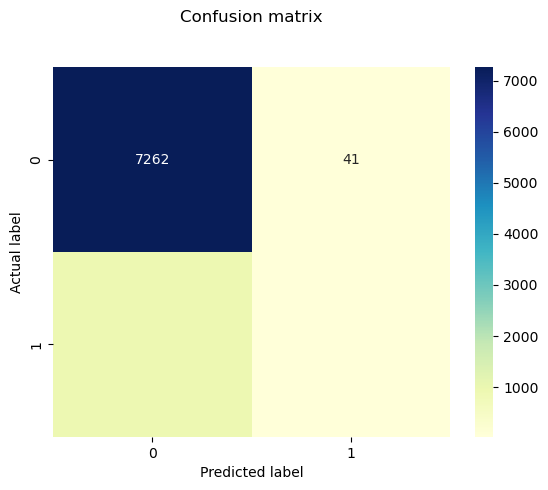

In [169]:
DT2_cnf_matrix = metrics.confusion_matrix(y2_test, model_DT2.predict(X2_test))
p = sns.heatmap(pd.DataFrame(knn2_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [170]:
# classification report
print(classification_report(y2_test,model_DT2.predict(X2_test)))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7303
         yes       0.56      0.03      0.05       935

    accuracy                           0.89      8238
   macro avg       0.72      0.51      0.50      8238
weighted avg       0.85      0.89      0.84      8238



#### SVM: Improving the Model

In [171]:
svc = SVC().fit(X2_train, y2_train)
svc_defaults = svc.score(X2_test, y2_test)
print(svc_defaults)

0.8865015780529255


In [101]:
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'gamma': [0.1, 1.0, 10.0, 100.0],}

In [102]:
grid = GridSearchCV(svc, param_grid=params).fit(X2_train, y2_train)
grid_score = grid.score(X2_test, y2_test)

In [103]:
best_kernel = grid.best_params_['kernel']
print(grid.best_params_)

{'gamma': 0.1, 'kernel': 'rbf'}


In [172]:
svc2_start = time.time()
svc2 = SVC(kernel = 'rbf', gamma = 0.1).fit(X2_train, y2_train)
svc2_end = time.time()
svc2_train_time = svc2_end - svc2_start
print("SVM Train Time %.4f" % svc2_train_time)

SVM Train Time 20.7708


In [173]:
SVM2_train_accuracy = accuracy_score(y2_train, svc2.predict(X2_train))
SVM2_test_accuracy = accuracy_score(y2_test, svc2.predict(X2_test))
print('SVM Train Score is %2.4f' % SVM_train_accuracy)
print('SVM Test Score is %2.4f' % SVM_test_accuracy)

SVM Train Score is 0.8876
SVM Test Score is 0.8865


Text(0.5, 23.52222222222222, 'Predicted label')

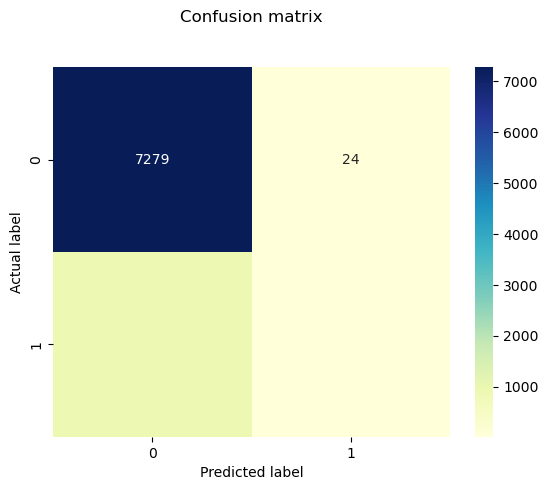

In [174]:
SVM2_cnf_matrix = metrics.confusion_matrix(y2_test, svc2.predict(X2_test))
p = sns.heatmap(pd.DataFrame(SVM2_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [175]:
# classification report
print(classification_report(y2_test,svc2.predict(X2_test)))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7303
         yes       0.40      0.02      0.03       935

    accuracy                           0.89      8238
   macro avg       0.64      0.51      0.49      8238
weighted avg       0.83      0.89      0.84      8238



#### Updated Results with improved model

In [176]:
res_dict_2 = {'Model': ['Logistic Regression','KNN', 'Decision Tree', 'SVM'],
           'Train Time': [logreg2_train_time, knn2_train_time, DT2_train_time, svc2_train_time],
           'Train Accuracy': [logreg2_train_accuracy, knn2_train_accuracy, DT2_train_accuracy, SVM2_train_accuracy],
           'Test Accuracy': [logreg2_test_accuracy, knn2_test_accuracy, DT2_test_accuracy, SVM2_test_accuracy]}
results2_df = pd.DataFrame(res_dict_2).set_index('Model')

In [177]:
results2_df

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,2.196873,0.887557,0.886502
KNN,0.018958,0.888467,0.884681
Decision Tree,0.031500,0.888164,0.887109
SVM,20.770820,0.889712,0.885530
